<a href="https://colab.research.google.com/github/OsvaldoSan/TSC/blob/master/Practica_Boston_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [2]:
data = load_boston()
df_features = pd.DataFrame(data.data,columns=data.feature_names)
df_target = data.target

# Tratamiento de los datos

## Escalamiento de los datos

In [3]:
scaler = StandardScaler()
scaler.fit(df_features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
Xs = pd.DataFrame(scaler.transform(df_features))

In [5]:
scalery = StandardScaler()
scalery.fit(pd.DataFrame(df_target))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
ys = pd.DataFrame(scalery.transform(pd.DataFrame(df_target)),columns=['Price'])

In [7]:
ys.head(2)

,Price
0,0.159686
1,-0.101524


# Construcción del modelo

In [8]:
Xst,Xsv,yst,ysv = train_test_split(Xs,ys)

In [10]:
modelo = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(Xst.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

modelo.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [11]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Prueba del modelo
example_batch = Xst[:10]
example_result = model.predict(example_batch)
example_result

array([[0.7141193 ],
       [0.49684542],
       [0.4369651 ],
       [0.2567907 ],
       [0.65582925],
       [0.3594082 ],
       [0.29440325],
       [0.07626811],
       [0.41358086],
       [0.39535743]], dtype=float32)

In [13]:
EPOCHS = 100

history = model.fit(
  Xst, yst,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

# Validación de los resultados

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,0.015003,0.091350,0.015003,0.174124,0.269715,0.174124,95
96,0.016118,0.094464,0.016118,0.166011,0.273653,0.166011,96
97,0.013114,0.081476,0.013114,0.172728,0.280302,0.172728,97
98,0.017385,0.100943,0.017385,0.148412,0.264342,0.148412,98
99,0.011446,0.078881,0.011446,0.167460,0.293591,0.167460,99


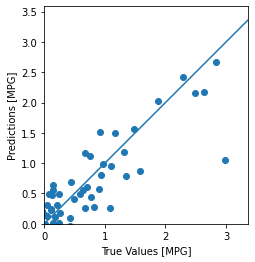

In [16]:
test_predictions = model.predict(Xsv).flatten()

plt.scatter(ysv, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])